[Text(0, 0.5, 'Harmonics')]

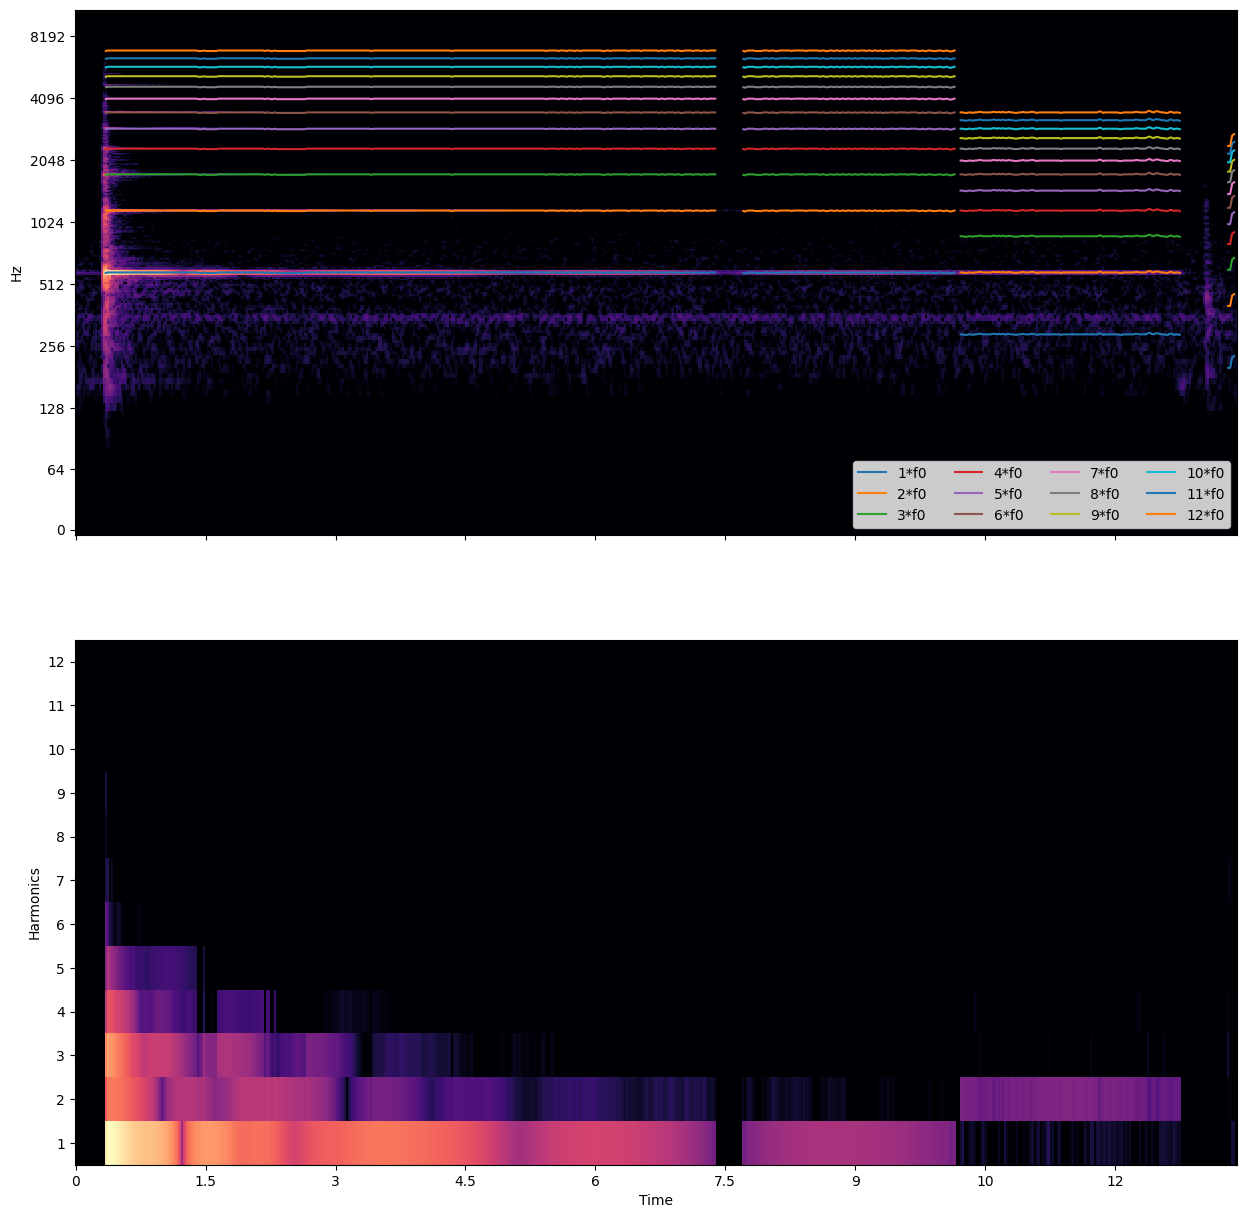

In [5]:
#Questo script sfrutta la libreria LIBROSA per studiare il comportamento nel
#tempo della frequenza fondamentale e delle sue armoniche (relativo ad un
#file audio qualsiasi).

%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import numpy as np
from scipy.signal import find_peaks
#Carico File di Lettura
y, sr = librosa.load('467047__kelsey_w__piano-note.wav')
ipd.Audio(y, rate=sr)
hop_length = 512
n_fft = 2048
Spett = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
freqs = librosa.fft_frequencies(sr=sr)
#Calcolo la frequenza fondamentale f0 nel tempo del file audio caricato
f0, voicing, voicing_p = librosa.pyin(y=y, sr=sr, fmin=200, fmax=700)
#Dichiaro le armoniche che voglio calcolare
harmonics = np.arange(1, 13)
#Calcolo l'andamento nel tempo delle armoniche
f0_harm = librosa.f0_harmonics(Spett, freqs=freqs, f0=f0, harmonics=harmonics)
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15,15))
librosa.display.specshow(librosa.amplitude_to_db(Spett, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
times = librosa.times_like(f0)
for h in harmonics:
    ax[0].plot(times, h * f0, label=f"{h}*f0")
ax[0].legend(ncols=4, loc='lower right')
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(f0_harm, ref=np.max),
                         x_axis='time', ax=ax[1])
ax[1].set_yticks(harmonics-1)
ax[1].set_yticklabels(harmonics)
ax[1].set(ylabel='Harmonics')

In [6]:
#Calcolo l'indice di inarmonicità come
arr = np.zeros((12,578))
arr2 = np.zeros((12))
for h in range(12):
  arr[h]= abs(f0_harm[h]-h*f0) #per vedere l'andamento nel tempo calcolo solo la variazione in modulo



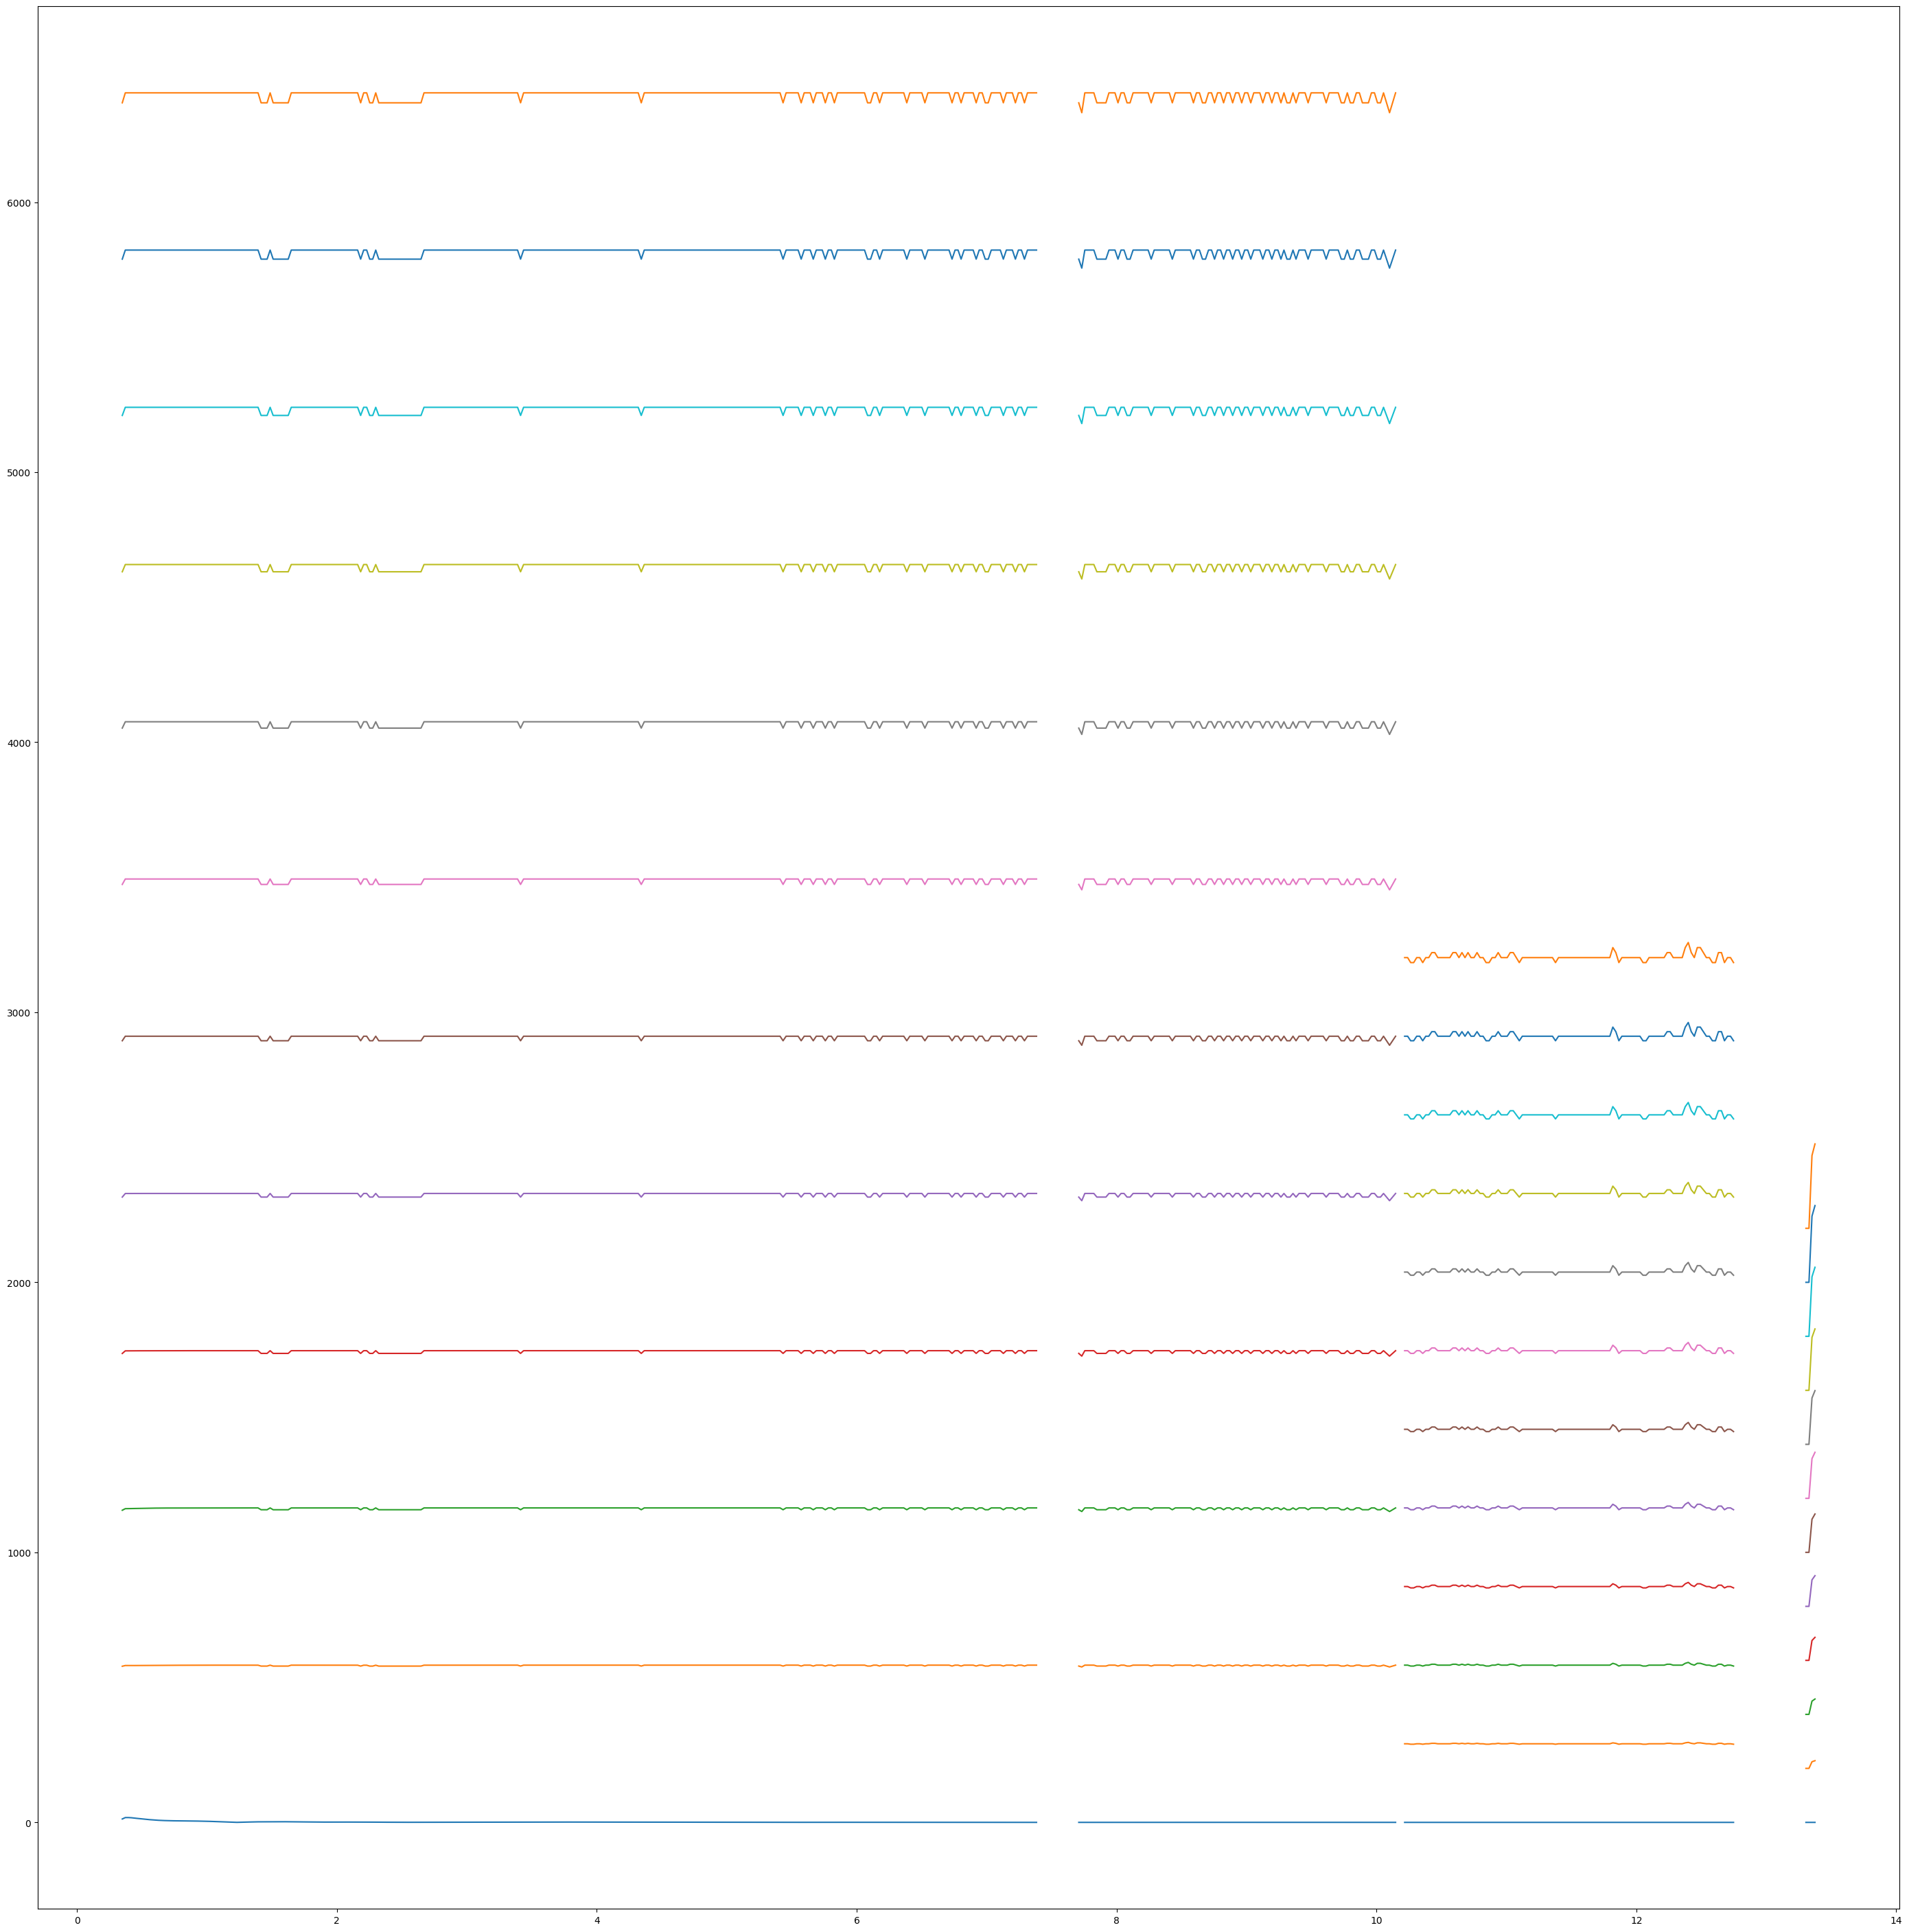

In [7]:
plt.figure(figsize=(35,36))
for h in range(12):
  plt.plot(times, arr[h])